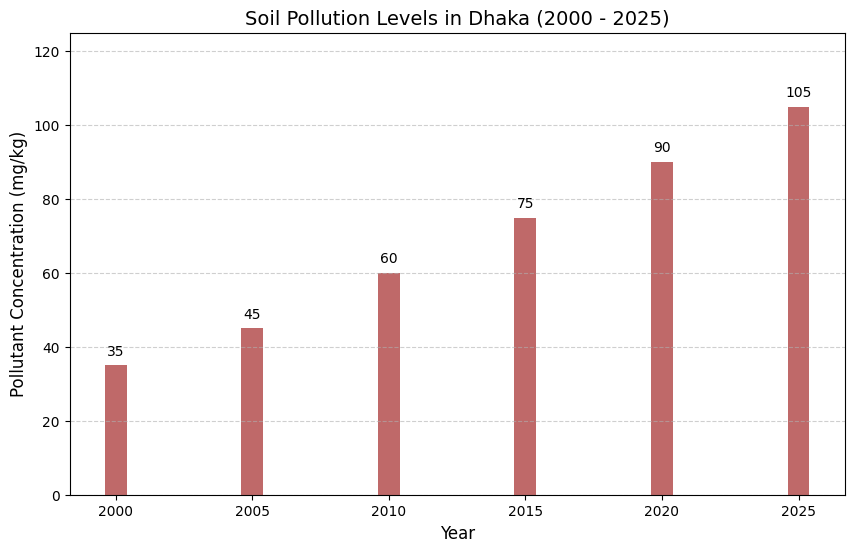

In [1]:
import matplotlib.pyplot as plt

# Data
years = [2000, 2005, 2010, 2015, 2020, 2025]
pollution_levels = [35, 45, 60, 75, 90, 105]  # example pollutant concentration in mg/kg

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(years, pollution_levels, color='brown', alpha=0.7)

# Add data labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center', va='bottom')

# Titles and labels
plt.title('Soil Pollution Levels in Dhaka (2000 - 2025)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Pollutant Concentration (mg/kg)', fontsize=12)
plt.ylim(0, max(pollution_levels) + 20)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


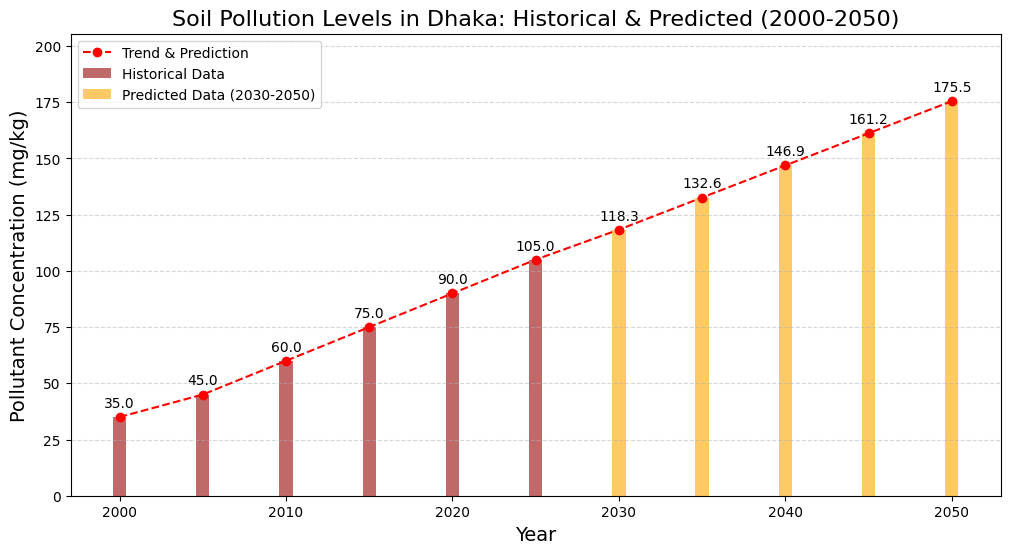

Predicted soil pollution level in Dhaka for 2050: 175.48 mg/kg


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Historical data
years = np.array([2000, 2005, 2010, 2015, 2020, 2025]).reshape(-1, 1)
pollution_levels = np.array([35, 45, 60, 75, 90, 105])

# Create and train linear regression model
model = LinearRegression()
model.fit(years, pollution_levels)

# Predict pollution levels for years up to 2050
future_years = np.array([2030, 2035, 2040, 2045, 2050]).reshape(-1, 1)
predicted_levels = model.predict(future_years)

# Combine historical and predicted data for plotting
all_years = np.vstack((years, future_years))
all_levels = np.concatenate((pollution_levels, predicted_levels))

# Plotting
plt.figure(figsize=(12,6))
plt.bar(years.flatten(), pollution_levels, color='brown', alpha=0.7, label='Historical Data')
plt.plot(all_years, all_levels, color='red', marker='o', linestyle='--', label='Trend & Prediction')

# Highlight predicted bars
plt.bar(future_years.flatten(), predicted_levels, color='orange', alpha=0.6, label='Predicted Data (2030-2050)')

# Data labels on bars
for x, y in zip(np.concatenate((years, future_years)).flatten(), all_levels):
    plt.text(x, y + 3, f"{y:.1f}", ha='center', va='bottom')

plt.title('Soil Pollution Levels in Dhaka: Historical & Predicted (2000-2050)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Pollutant Concentration (mg/kg)', fontsize=14)
plt.ylim(0, max(all_levels) + 30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# Print predicted value for 2050
print(f"Predicted soil pollution level in Dhaka for 2050: {predicted_levels[-1]:.2f} mg/kg")


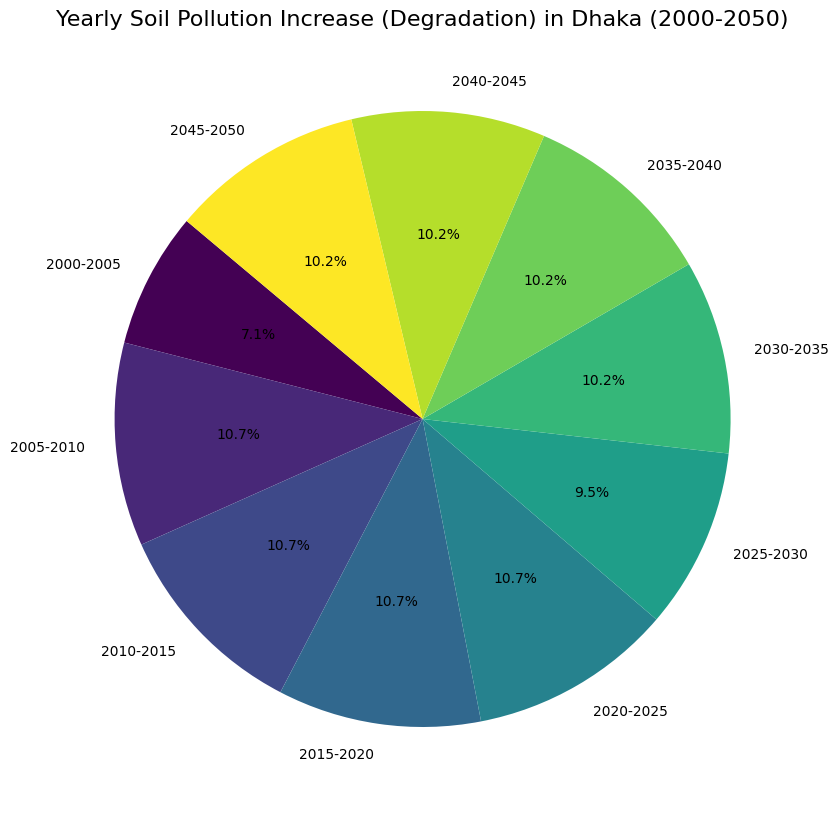

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
years = np.array([2000, 2005, 2010, 2015, 2020, 2025]).reshape(-1, 1)
pollution_levels = np.array([30, 40, 55, 70, 85, 100])  # historical data

# Linear regression model for prediction up to 2050 (no control)
model = LinearRegression()
model.fit(years, pollution_levels)
future_years = np.arange(2030, 2055, 5).reshape(-1, 1)
predicted_levels = model.predict(future_years)

# Combine all years and pollution levels (historical + predicted)
all_years = np.vstack((years, future_years)).flatten()
all_levels = np.concatenate((pollution_levels, predicted_levels))

# Calculate increments (degradation) between consecutive years
increments = np.diff(all_levels)

# Labels for each interval (e.g., "2000-2005")
interval_labels = [f"{all_years[i]}-{all_years[i+1]}" for i in range(len(all_years)-1)]

# Pie chart
plt.figure(figsize=(10,10))
plt.pie(increments, labels=interval_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0,1,len(increments))))
plt.title('Yearly Soil Pollution Increase (Degradation) in Dhaka (2000-2050)', fontsize=16)
plt.show()
